In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Logbook esperineza MuLife

## Determinazione Punti di Lavoro PMT

### 15 Febbraio: 
cella per scrivere cosa facciamo questo giorno

In [215]:
df_count = pd.read_csv("./data/counts.csv",sep=";")

In [216]:
df_count['err_V']=df_count['Alimentazione [V]']*0.0005+1
df_count['err_1']=np.sqrt(df_count['PMT1'])
df_count['err_2']=np.sqrt(df_count['PMT2'])
df_count['err_3']=np.sqrt(df_count['PMT3'])

In [217]:
df_count

,Alimentazione [V],PMT1,PMT2,PMT3,err_V,err_1,err_2,err_3
0,1500,0,4,12,1.7500,0.000000,2.000000,3.464102
1,1525,1,11,27,1.7625,1.000000,3.316625,5.196152
2,1550,6,31,177,1.7750,2.449490,5.567764,13.304135
3,1575,9,63,581,1.7875,3.000000,7.937254,24.103942
4,1600,31,182,1298,1.8000,5.567764,13.490738,36.027767
5,1625,63,292,1933,1.8125,7.937254,17.088007,43.965896
6,1650,186,485,2849,1.8250,13.638182,22.022716,53.376025
7,1675,364,826,5438,1.8375,19.078784,28.740216,73.742796
8,1700,601,1111,23432,1.8500,24.515301,33.331667,153.075145
9,1725,874,1883,60412,1.8625,29.563491,43.393548,245.788527


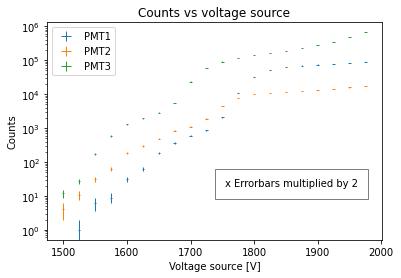

In [293]:
fig = plt.figure()

plt.errorbar(df_count['Alimentazione [V]'],df_count['PMT1'],
             xerr=df_count['err_V'],yerr=df_count['err_1'],linestyle='None',elinewidth=1,label='PMT1')

plt.errorbar(df_count['Alimentazione [V]'],df_count['PMT2'],
             xerr=df_count['err_V'],yerr=df_count['err_2'],linestyle='None',elinewidth=1,label='PMT2')

plt.errorbar(df_count['Alimentazione [V]'],df_count['PMT3'],
             xerr=df_count['err_V'],yerr=df_count['err_3'],linestyle='None',elinewidth=1,label='PMT3')

fig.text(0.69, 0.31, "x Errorbars multiplied by 2", fontsize=10, 
         ha='center',bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.xlabel('Voltage source [V]')
plt.ylabel('Counts')
plt.title('Counts vs voltage source')
plt.legend()
plt.yscale('log')
plt.savefig('./plots/counts123_new.pdf')
plt.show()

In [249]:
df_count_print=df_count.copy()
df_count_print["Alimentazione [V]"] = df_count["Alimentazione [V]"].astype(str) + '±' + df_count["err_V"].round(0).astype(int).astype(str)
df_count_print['Counts 1']=df_count["PMT1"].astype(str) + '±' + df_count["err_1"].round(0).astype(int).astype(str)
df_count_print['Counts 2']=df_count["PMT2"].astype(str) + '±' + df_count["err_2"].round(0).astype(int).astype(str)
df_count_print['Counts 3']=df_count["PMT3"].astype(str) + '±' + df_count["err_3"].round(0).astype(int).astype(str)
df_count_print.drop(['err_1','err_2','err_3', 'err_V','PMT1','PMT2','PMT3'],axis=1,inplace=True)

In [251]:
print(df_count_print.to_latex(index=False))

\begin{tabular}{llll}
\toprule
Alimentazione [V] &  Counts 1 &  Counts 2 &   Counts 3 \\
\midrule
           1500±2 &       0±0 &       4±2 &       12±3 \\
           1525±2 &       1±1 &      11±3 &       27±5 \\
           1550±2 &       6±2 &      31±6 &     177±13 \\
           1575±2 &       9±3 &      63±8 &     581±24 \\
           1600±2 &      31±6 &    182±13 &    1298±36 \\
           1625±2 &      63±8 &    292±17 &    1933±44 \\
           1650±2 &    186±14 &    485±22 &    2849±53 \\
           1675±2 &    364±19 &    826±29 &    5438±74 \\
           1700±2 &    601±25 &   1111±33 &  23432±153 \\
           1725±2 &    874±30 &   1883±43 &  60412±246 \\
           1750±2 &   2077±46 &   4549±67 &  91147±302 \\
           1775±2 & 10979±105 &   7787±88 & 118266±344 \\
           1800±2 & 31783±178 & 10069±100 & 139454±373 \\
           1825±2 & 50880±226 & 10793±104 & 164339±405 \\
           1850±2 & 62821±251 & 11703±108 & 188011±434 \\
           1875±2 & 69648±264 & 

## Segnale di Start

## Segnale di Stop

## Acquisizione segnali con FPGA

## Prima Acquisizione dati per MuLife

## Errori Sistematici

## Alterazione vita media del muone negativo dalla interazione con il materiale scintillatore

## Spettro in energia dell'elettrone di decadimento

### Calibrazione del modulo di amplificazione di carica

### Altro...

## Efficienza PMTs

In [187]:
df_eff2 = pd.read_csv("./data/eff2.txt",sep="\t")


In [188]:
df_eff2['doppie_acc']=df_eff2['1']*df_eff2['3']*98*10**(-11)
df_eff2['err1']=np.sqrt(df_eff2['1'])
df_eff2['err2']=np.sqrt(df_eff2['2'])
df_eff2['err3']=np.sqrt(df_eff2['3'])

In [299]:
df_eff2['efficienza']=df_eff2['1&2&3']/(df_eff2['1&3']-df_eff2['doppie_acc'])
df_eff2['err_V']=(df_eff2['V']*0.0005+1)
df_eff2['err_eff']=np.sqrt(df_eff2['efficienza']*(1-df_eff2['efficienza'])/(df_eff2['1&3']-df_eff2['doppie_acc']))
df_eff2['err_tri']=np.sqrt(df_eff2['efficienza']*(1-df_eff2['efficienza'])*(df_eff2['1&3']-df_eff2['doppie_acc']))

In [300]:
df_eff2.head()

,V,1,2,3,1&3,1&2&3,doppie_acc,err1,err2,err3,efficienza,err_V,err_eff,err_tri
0,1500,117786,43,124865,1787,14,14.413202,343.199650,6.557439,353.362420,0.007898,1.7500,0.002102,3.726852
1,1525,118337,116,127691,1861,28,14.808358,344.001453,10.770330,357.338775,0.015166,1.7625,0.002844,5.251223
2,1550,114947,300,125546,1828,80,14.142513,339.038346,17.320508,354.324710,0.044105,1.7750,0.004821,8.744805
3,1575,128549,757,129436,1827,249,16.306091,358.537306,27.513633,359.772150,0.137516,1.7875,0.008093,14.654639
4,1600,127551,1751,131284,1843,587,16.410497,357.142829,41.844952,362.331340,0.321364,1.8000,0.010927,19.958942


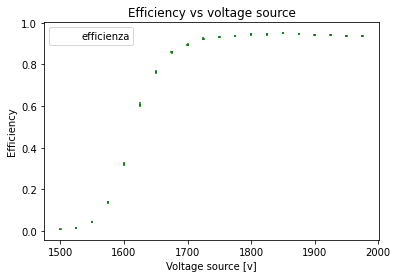

In [142]:
fig_4=df_eff2.plot(x='V',y='efficienza',
             title='Efficiency vs voltage source', 
             xlabel='Voltage source [v]',ylabel='Efficiency',xerr='err_V',yerr='err_eff',style='.',color='green',linestyle='None'
                ).get_figure()

In [45]:
fig_4.savefig('./plots/eff_2.pdf')

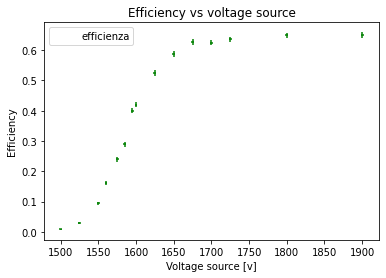

In [307]:
df_eff3 = pd.read_csv("./data/eff3.txt",sep="\t")
df_eff3['doppie_acc']=df_eff3['1']*df_eff3['2']*98*10**(-11)
df_eff3['err1']=np.sqrt(df_eff3['1'])
df_eff3['err2']=np.sqrt(df_eff3['2'])
df_eff3['err3']=np.sqrt(df_eff3['3'])
df_eff3['efficienza']=df_eff3['1&2&3']/(df_eff3['1&2']-df_eff3['doppie_acc'])
df_eff3['err_V']=(df_eff3['V']*0.0005+1)
df_eff3['err_eff']=np.sqrt(df_eff3['efficienza']*(1-df_eff3['efficienza'])/(df_eff3['1&2']-df_eff3['doppie_acc']))
df_eff3['err_tri']=np.sqrt(df_eff3['efficienza']*(1-df_eff3['efficienza'])*(df_eff3['1&2']-df_eff3['doppie_acc']))
fig_4=df_eff3.plot(x='V',y='efficienza',
             title='Efficiency vs voltage source', 
             xlabel='Voltage source [v]',ylabel='Efficiency',xerr='err_V',yerr='err_eff',style='.',color='green',linestyle='None'
                ).get_figure()

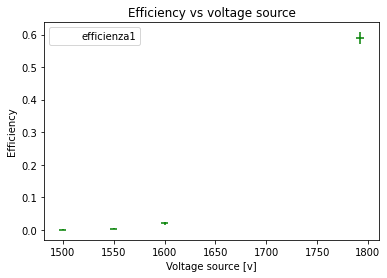

In [62]:
df_eff1 = pd.read_csv("./data/eff1.txt",sep="\t")
df_eff1['efficienza1']=df_eff1['1&2&3']/df_eff1['2&3']
df_eff1['err_V1']=(df_eff1['V1']*0.0005+1)*2
df_eff1['err_eff1']=np.sqrt(df_eff1['efficienza1']*(1-df_eff1['efficienza1'])/df_eff1['2&3'])*2
fig_4=df_eff1.plot(x='V1',y='efficienza1',
             title='Efficiency vs voltage source', 
             xlabel='Voltage source [v]',ylabel='Efficiency',xerr='err_V1',yerr='err_eff1',style='.',color='green',linestyle='None'
                ).get_figure()

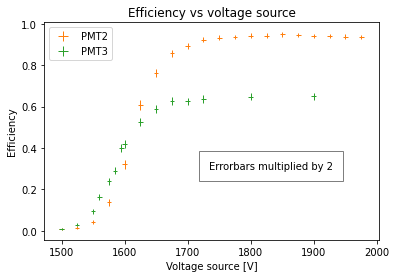

In [296]:
fig = plt.figure()

plt.errorbar(df_eff2['V'],df_eff2['efficienza'],
             xerr=2*df_eff2['err_V'],yerr=2*df_eff2['err_eff'],label='PMT2',linestyle='None',elinewidth=1,
             ecolor='#ff7f0e')

plt.errorbar(df_eff3['V'],df_eff3['efficienza'],

             xerr=2*df_eff3['err_V'],yerr=2*df_eff3['err_eff'],label='PMT3',linestyle='None',elinewidth=1,
             ecolor='#2ca02c')

fig.text(0.65, 0.37, "Errorbars multiplied by 2", fontsize=10, 
         ha='center',bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.xlabel('Voltage source [V]')
plt.ylabel('Efficiency')
plt.title('Efficiency vs voltage source')
plt.legend()
plt.savefig('./plots/eff.pdf')
plt.show()

In [303]:
df_eff2_print=df_eff2.copy()

In [304]:
df_eff2_print["V"] = df_eff2["V"].astype(str) + '±' + df_eff2["err_V"].round(0).astype(int).astype(str)
df_eff2_print['1']=df_eff2["1"].astype(str) + '±' + df_eff2["err1"].round(0).astype(int).astype(str)
df_eff2_print['2']=df_eff2["2"].astype(str) + '±' + df_eff2["err2"].round(0).astype(int).astype(str)
df_eff2_print['3']=df_eff2["3"].astype(str) + '±' + df_eff2["err3"].round(0).astype(int).astype(str)
df_eff2_print['efficienza']=df_eff2["efficienza"].round(3).astype(str) + '±' + df_eff2["err_eff"].round(3).astype(str)
df_eff2_print['doppie_acc']=df_eff2_print['doppie_acc'].round(2)
df_eff2_print['1&2&3']=df_eff2["1&2&3"].astype(str) + '±' + df_eff2["err_tri"].round(0).astype(int).astype(str)

In [305]:
df_eff2_print.drop(['err1','err2','err3','err_V','err_eff','err_tri'],axis=1,inplace=True)
print(df_eff2_print.to_latex(index=False))

\begin{tabular}{llllrlrl}
\toprule
     V &          1 &          2 &          3 &  1\&3 &   1\&2\&3 &  doppie\_acc &  efficienza \\
\midrule
1500±2 & 117786±343 &       43±7 & 124865±353 & 1787 &    14±4 &       14.41 & 0.008±0.002 \\
1525±2 & 118337±344 &     116±11 & 127691±357 & 1861 &    28±5 &       14.81 & 0.015±0.003 \\
1550±2 & 114947±339 &     300±17 & 125546±354 & 1828 &    80±9 &       14.14 & 0.044±0.005 \\
1575±2 & 128549±359 &     757±28 & 129436±360 & 1827 &  249±15 &       16.31 & 0.138±0.008 \\
1600±2 & 127551±357 &    1751±42 & 131284±362 & 1843 &  587±20 &       16.41 & 0.321±0.011 \\
1625±2 & 128204±358 &    3351±58 & 134213±366 & 1859 & 1119±21 &       16.86 & 0.607±0.011 \\
1650±2 & 128634±359 &    5329±73 & 131384±362 & 1890 & 1428±18 &       16.56 &  0.762±0.01 \\
1675±2 & 128860±359 &    7889±89 & 128064±358 & 1848 & 1571±15 &       16.17 & 0.858±0.008 \\
1700±2 & 128641±359 &  11111±105 & 129291±360 & 1875 & 1662±13 &       16.30 & 0.894±0.007 \\
1725±2 & 129

In [309]:
df_eff3_print=df_eff3.copy()
df_eff3_print["V"] = df_eff3["V"].astype(str) + '±' + df_eff3["err_V"].round(0).astype(int).astype(str)
df_eff3_print['1']=df_eff3["1"].astype(str) + '±' + df_eff3["err1"].round(0).astype(int).astype(str)
df_eff3_print['2']=df_eff3["2"].astype(str) + '±' + df_eff3["err2"].round(0).astype(int).astype(str)
df_eff3_print['3']=df_eff3["3"].astype(str) + '±' + df_eff3["err3"].round(0).astype(int).astype(str)
df_eff3_print['efficienza']=df_eff3["efficienza"].round(3).astype(str) + '±' + df_eff2["err_eff"].round(3).astype(str)
df_eff3_print['doppie_acc']=df_eff3_print['doppie_acc'].round(2)
df_eff3_print['1&2&3']=df_eff3["1&2&3"].astype(str) + '±' + df_eff3["err_tri"].round(0).astype(int).astype(str)
df_eff3_print.drop(['err1','err2','err3','err_V','err_eff','err_tri'],axis=1,inplace=True)
print(df_eff3_print.to_latex(index=False))

\begin{tabular}{llllrlrl}
\toprule
     V &          1 &          2 &            3 &  1\&2 &   1\&2\&3 &  doppie\_acc &  efficienza \\
\midrule
1500±2 & 107990±329 & 109758±331 &         87±9 & 2733 &    22±5 &       11.62 & 0.008±0.002 \\
1525±2 & 108912±330 & 109573±331 &       298±17 & 2791 &    83±9 &       11.70 &  0.03±0.003 \\
1550±2 & 108212±329 & 109628±331 &      1395±37 & 2747 &  257±15 &       11.63 & 0.094±0.005 \\
1560±2 & 107425±328 & 109808±331 &      2573±51 & 2743 &  440±19 &       11.56 & 0.161±0.008 \\
1575±2 & 107749±328 & 109709±331 &      4973±71 & 2779 &  662±22 &       11.58 & 0.239±0.011 \\
1585±2 & 107559±328 & 110563±333 &      6468±80 & 2842 &  819±24 &       11.65 & 0.289±0.011 \\
1595±2 & 107066±327 & 109347±331 &      9051±95 & 2792 & 1113±26 &       11.47 &    0.4±0.01 \\
1600±2 & 108045±329 & 110262±332 &    10339±102 & 2787 & 1167±26 &       11.67 &  0.42±0.008 \\
1625±2 & 107711±328 & 110826±333 &    16819±130 & 2841 & 1485±27 &       11.70 & 0.525±0

In [ ]:
df_eff1=pd.DataFrame({'1': [122607], '2': [111009],'3':[118695],'2&3':[2800],'1&2&3':[1733]})

In [ ]:
df_eff1['doppie_acc']=df_eff1['1']*df_eff1['2']*98*10**(-11)
df_eff1['err1']=np.sqrt(df_eff1['1'])
df_eff1['err2']=np.sqrt(df_eff1['2'])
df_eff1['err3']=np.sqrt(df_eff1['3'])
df_eff1['efficienza']=df_eff1['1&2&3']/(df_eff1['2&3']-df_eff1['doppie_acc'])
#df_eff1['err_V']=(df_eff1['V']*0.0005+1)
df_eff1['err_eff']=np.sqrt(df_eff1['efficienza']*(1-df_eff1['efficienza'])/(df_eff1['2&3']-df_eff1['doppie_acc']))
df_eff1['err_tri']=np.sqrt(df_eff1['efficienza']*(1-df_eff1['efficienza'])*(df_eff1['2&3']-df_eff1['doppie_acc']))

In [ ]:
df_eff1